In [2]:
import eyepy.io as epio
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from skimage import img_as_ubyte

In [1]:
from uncertainties import ufloat
from uncertainties.umath import *

In [3]:
vol = epio.read_vol("/home/morelle/Data/RAW/KB0740L.vol")
xml = epio.read_xml_export("/home/morelle/Data/XML Exports f. RPE/KB0740L/")

[PosixPath('/home/morelle/Data/XML Exports f. RPE/KB0740L/7404BDC0.xml')]


In [22]:
scalex = ufloat(vol.ScaleX, vol.ScaleX * 0.064)
scaley = ufloat(vol.Distance, vol.Distance * 0.064)
vox_size = (scalex*scaley*vol.ScaleZ)*1e9
print(vox_size)

(2.67+/-0.24)e+03


In [23]:
0.24/2.67

0.0898876404494382

In [40]:
from tqdm import tqdm
best = np.inf
for i in tqdm(range(1000, 10000)):
    transformed = np.log(i*vol[1].scan_raw+1)
    t_img = img_as_ubyte(transformed/transformed.max())
    
    error = np.sum(xml[1][..., 0]- t_img)
    if error < best:
        best = i
    

100%|██████████| 9000/9000 [02:46<00:00, 53.94it/s]


(array([ 68446.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 185506.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

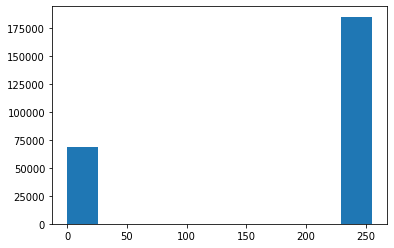

In [43]:
plt.hist((xml[1][..., 0]- t_img).flatten())

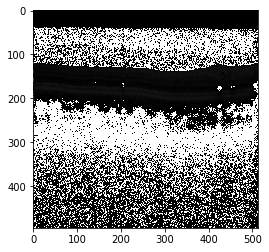

In [34]:
raw_conv = img_as_ubyte(np.power(vol[1].scan_raw, 1/4))
raw_conv = img_as_ubyte(np.log(5000*vol[1].scan_raw+1)/np.log(10000*vol[1].scan_raw+1).max())

plt.imshow(xml[1][..., 2]- raw_conv, cmap="gray", vmin=0, vmax=255)

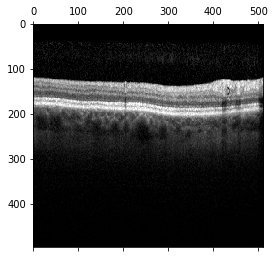

In [36]:
plt.matshow(raw_conv, cmap="gray")

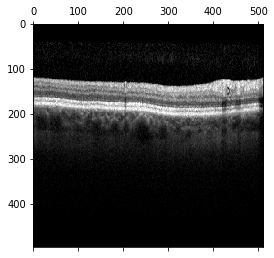

In [30]:
plt.matshow(xml[1][..., 1], cmap="gray")

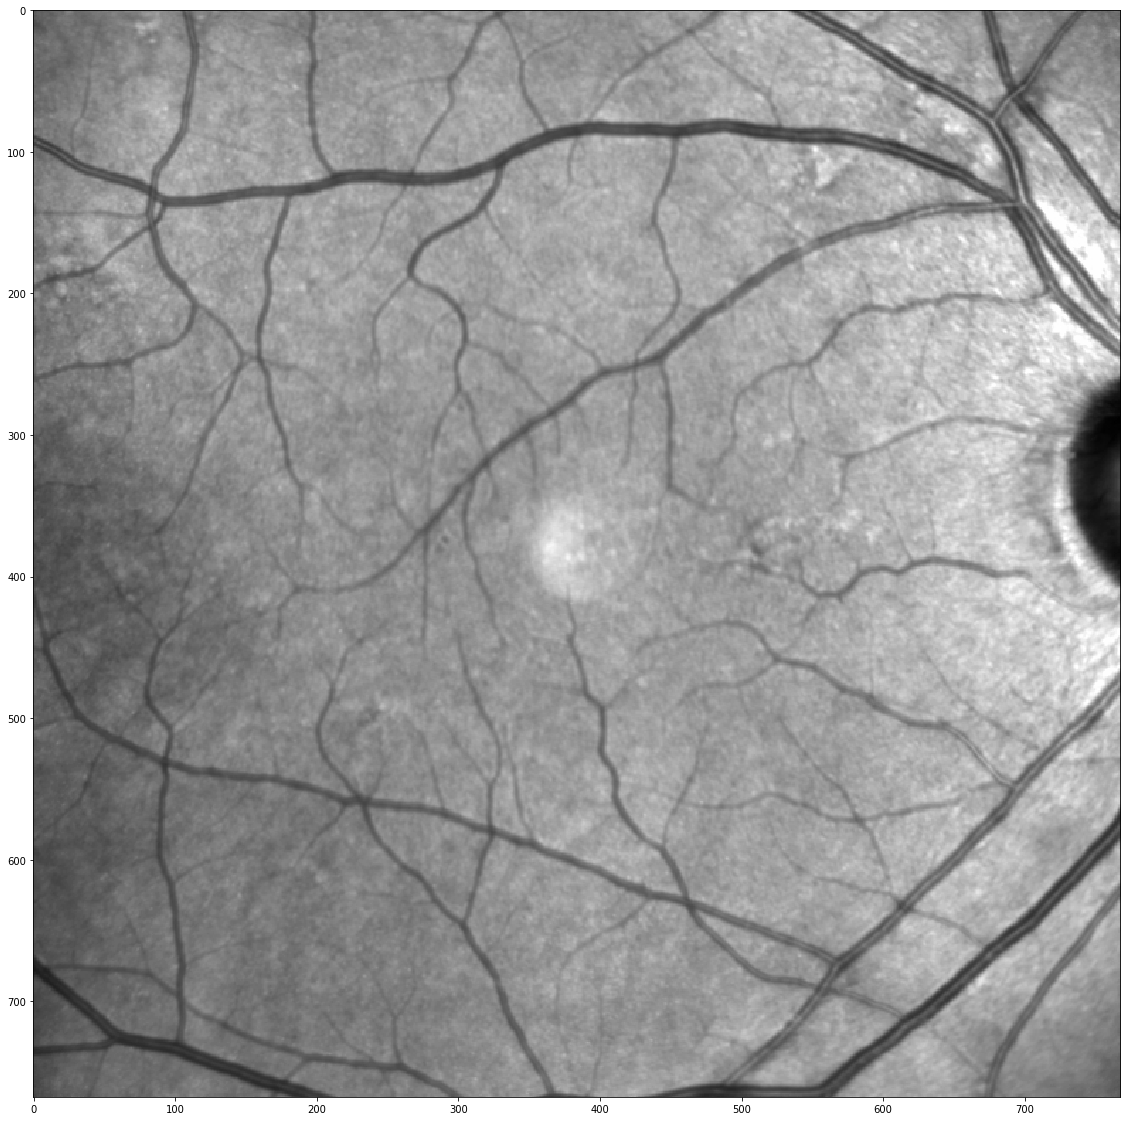

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
ax.imshow(xml.slo[..., 1], cmap="gray" )

In [31]:
noise1 = vol.slo - xml.slo[..., 2]

In [28]:
noise2 = vol.slo - xml.slo[..., 2]

In [44]:
vol.NumBScans

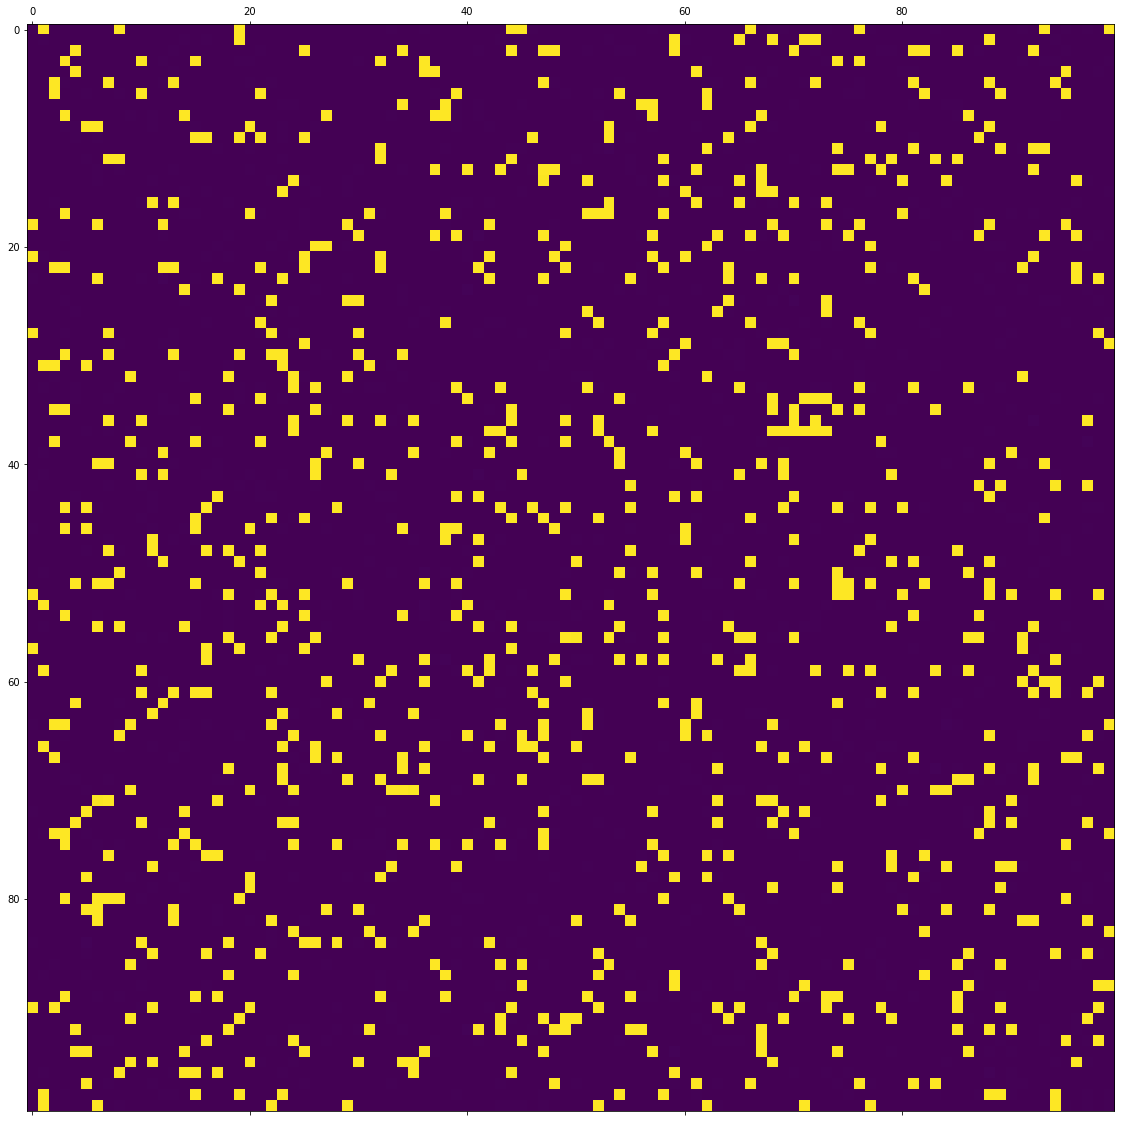

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(20,20))
ax.matshow((noise1 - noise2)[:100, :100])

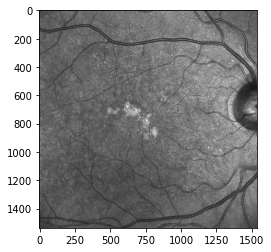

In [12]:
plt.imshow(np.stack([vol.slo, vol.slo,vol.slo], axis=-1), cmap="gray")